In [269]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [270]:
color= sns.color_palette()
sns.set_style('darkgrid')

In [271]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

Id = df_test["Id"]

df_train.set_index("Id", inplace = True)
df_test.set_index("Id", inplace = True)

In [272]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [274]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [275]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [276]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [277]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

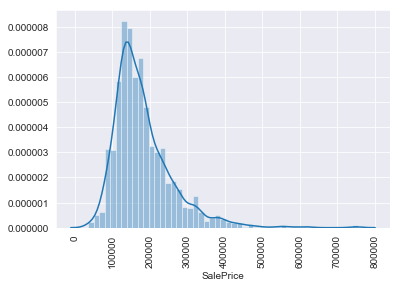

In [278]:
# plt.hist(df_train["SalePrice"], normed=True)

sns.distplot(df_train['SalePrice'])
plt.xticks(rotation=90)

In [279]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [280]:
null_values = df_train.isnull().sum().loc[lambda x: x > 0]
null_count = df_train.isnull().count().filter(items=null_values.index)
null_percent = null_values / null_count
pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
    sort_values(['null_count'], ascending=False)

,null_count,null_percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [282]:
missing_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
                  'FireplaceQu', 'LotFrontage']
df_train.drop(missing_columns, inplace=True, axis=1)
df_test.drop(missing_columns, inplace=True, axis=1)

In [283]:
null_values = df_train.isnull().sum().loc[lambda x: x > 0]
null_count = df_train.isnull().count().filter(items=null_values.index)
null_percent = null_values / null_count
pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
    sort_values(['null_count'], ascending=False)

,null_count,null_percent
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342


In [284]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [285]:
feature_categories = {
    'MSSubClass': 'c',
    'MSZoning': 'c',
    'LotArea': 'n',
    'Street': 'c',
    'LotShape': 'c',
    'LandContour': 'c',
    'Utilities': 'c',
    'LotConfig': 'c',
    'LandSlope': 'c',
    'Neighborhood': 'c',
    'Condition1': 'c',
    'Condition2': 'c',
    'BldgType': 'c',
    'HouseStyle': 'c',
    'OverallQual': 'c',
    'OverallCond': 'c',
    'YearBuilt': 'n',
    'YearRemodAdd': 'n',
    'RoofStyle': 'c',
    'RoofMatl': 'c',
    'Exterior1st': 'c',
    'Exterior2nd': 'c',
    'MasVnrType': 'c',
    'MasVnrArea': 'n',
    'ExterQual': 'c',
    'ExterCond': 'c',
    'Foundation': 'c',
    'BsmtQual': 'c',
    'BsmtCond': 'c',
    'BsmtExposure': 'c',
    'BsmtFinType1': 'c',
    'BsmtFinSF1': 'n',
    'BsmtFinType2': 'c',
    'BsmtFinSF2': 'n',
    'BsmtUnfSF': 'n',
    'TotalBsmtSF': 'n',
    'Heating': 'c',
    'HeatingQC': 'c',
    'CentralAir': 'c',
    'Electrical': 'c',
    '1stFlrSF': 'n',
    '2ndFlrSF': 'n',
    'LowQualFinSF': 'n',
    'GrLivArea': 'n',
    'BsmtFullBath': 'n',
    'BsmtHalfBath': 'n',
    'FullBath': 'n',
    'HalfBath': 'n',
    'KitchenAbvGr': 'n',
    'KitchenQual': 'c',
    'TotRmsAbvGrd': 'n',
    'Functional': 'c',
    'Fireplaces': 'n',
    'GarageType': 'c',
    'GarageYrBlt': 'n',
    'GarageFinish': 'c',
    'GarageCars': 'n',
    'GarageArea': 'n',
    'GarageQual': 'c',
    'GarageCond': 'c',
    'PavedDrive': 'c',
    'WoodDeckSF': 'n',
    'OpenPorchSF': 'n',
    'EnclosedPorch': 'n',
    '3SsnPorch': 'n',
    'ScreenPorch': 'n',
    'PoolArea': 'n',
    'MiscVal': 'n',
    'MoSold': 'c',
    'YrSold': 'n',
    'SaleType': 'c',
    'SaleCondition': 'c'
}

In [286]:
months_replace = {
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'aug',
    9: 'sep',
    10: 'oct',
    11: 'nov',
    12: 'dec'
}

In [287]:
df_train['MoSold'].replace(months_replace, inplace=True)
df_test['MoSold'].replace(months_replace, inplace=True)

In [288]:
df_train['MoSold'].value_counts()

jun    253
jul    234
may    204
apr    141
aug    122
mar    106
oct     89
nov     79
sep     63
dec     59
jan     58
feb     52
Name: MoSold, dtype: int64


 mu = 180921.20 and sigma = 79415.29



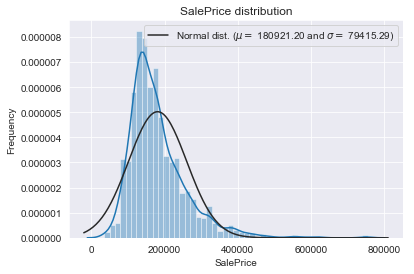

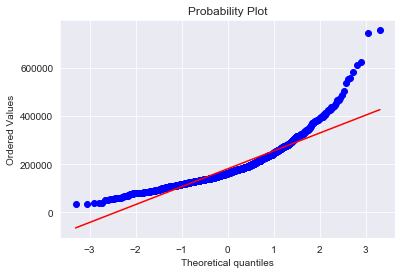

In [290]:
sns.distplot(df_train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()


 mu = 12.02 and sigma = 0.40



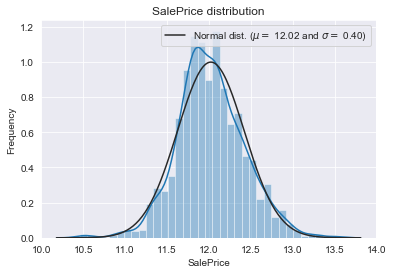

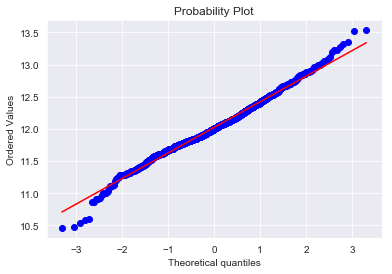

In [291]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

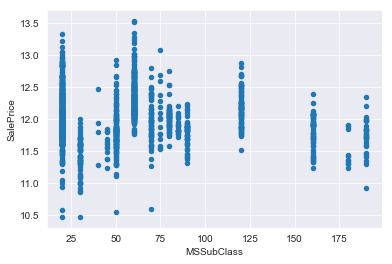

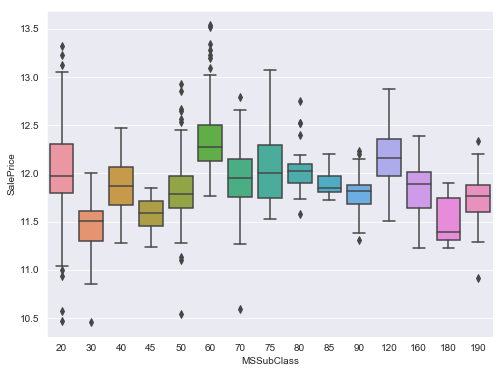

In [292]:
var = "MSSubClass"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice')

f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data = data)

In [252]:
ms_sub_class_replace = {
    20: 'a',
    30: 'b',
    40: 'c',
    45: 'd',
    50: 'e',
    60: 'f',
    70: 'g',
    75: 'h',
    80: 'i',
    85: 'j',
    90: 'k',
    120: 'l',
    150: 'm',
    160: 'n',
    180: 'o',
    190: 'p'
}

In [294]:
df_train['MSSubClass'].replace(ms_sub_class_replace, inplace=True)
df_test['MSSubClass'].replace(ms_sub_class_replace, inplace=True)

In [295]:
def categorical_comp(df, var):
    data = pd.concat([df['SalePrice'], df[var]], axis = 1)

    f, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=var, y='SalePrice', data = data)
    plt.xticks(rotation=90)

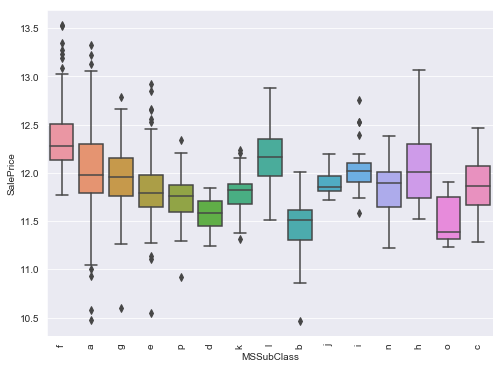

In [296]:
categorical_comp(df_train, "MSSubClass")

In [297]:
categorical_features = dict(filter(lambda x: x[1]=='c', feature_categories.items()))

In [298]:
categorical_features

{'MSSubClass': 'c',
 'MSZoning': 'c',
 'Street': 'c',
 'LotShape': 'c',
 'LandContour': 'c',
 'Utilities': 'c',
 'LotConfig': 'c',
 'LandSlope': 'c',
 'Neighborhood': 'c',
 'Condition1': 'c',
 'Condition2': 'c',
 'BldgType': 'c',
 'HouseStyle': 'c',
 'OverallQual': 'c',
 'OverallCond': 'c',
 'RoofStyle': 'c',
 'RoofMatl': 'c',
 'Exterior1st': 'c',
 'Exterior2nd': 'c',
 'MasVnrType': 'c',
 'ExterQual': 'c',
 'ExterCond': 'c',
 'Foundation': 'c',
 'BsmtQual': 'c',
 'BsmtCond': 'c',
 'BsmtExposure': 'c',
 'BsmtFinType1': 'c',
 'BsmtFinType2': 'c',
 'Heating': 'c',
 'HeatingQC': 'c',
 'CentralAir': 'c',
 'Electrical': 'c',
 'KitchenQual': 'c',
 'Functional': 'c',
 'GarageType': 'c',
 'GarageFinish': 'c',
 'GarageQual': 'c',
 'GarageCond': 'c',
 'PavedDrive': 'c',
 'MoSold': 'c',
 'SaleType': 'c',
 'SaleCondition': 'c'}

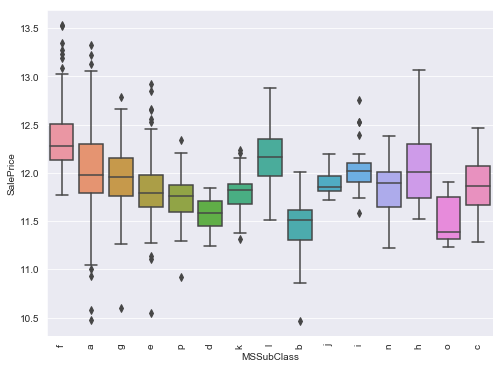

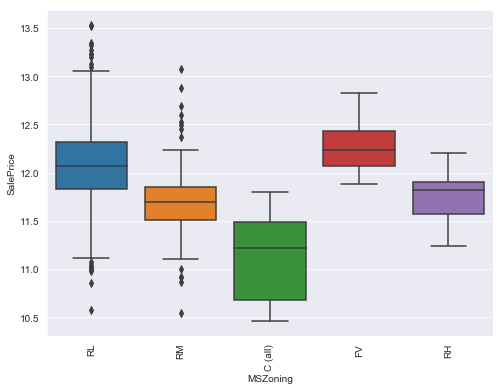

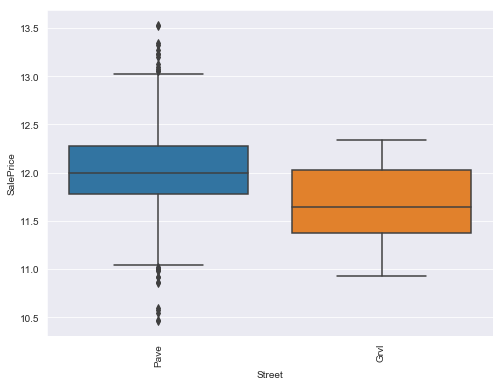

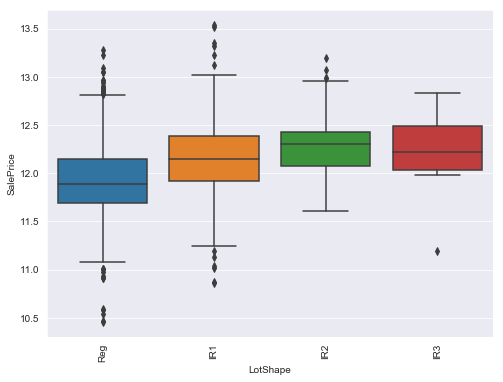

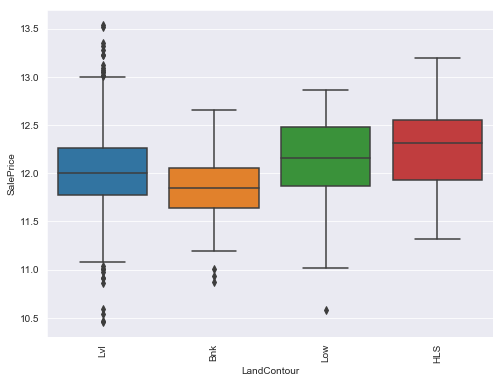

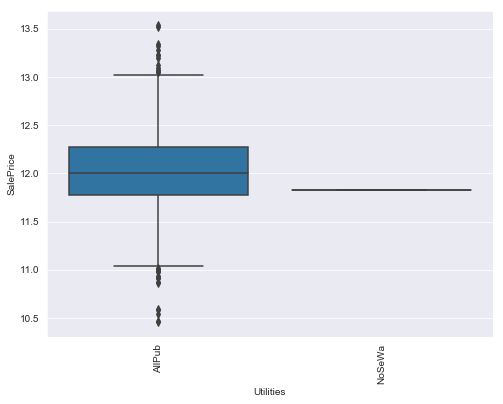

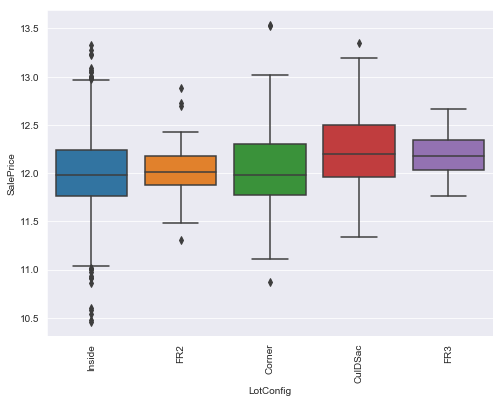

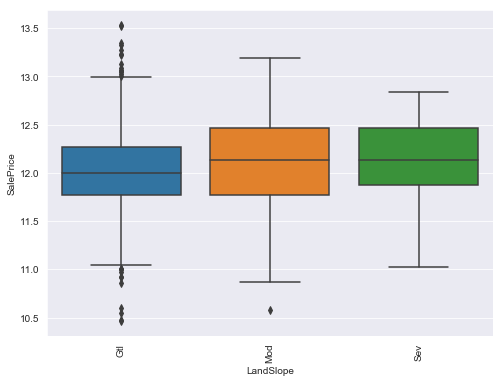

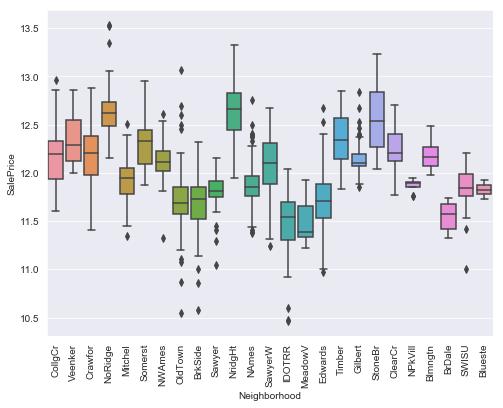

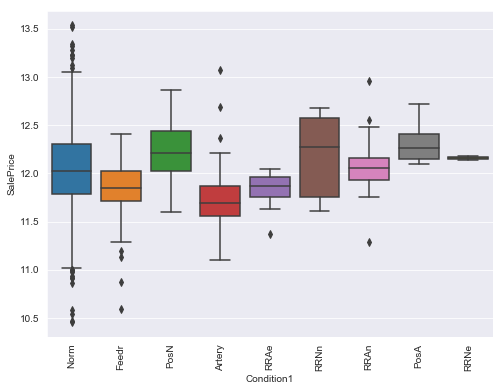

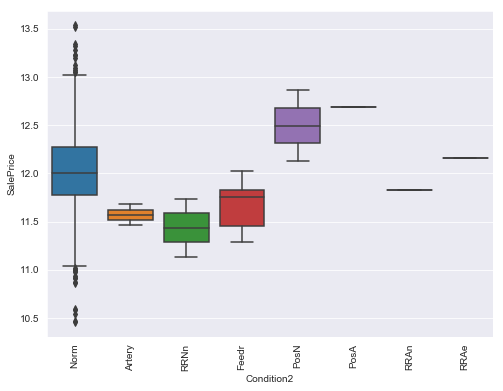

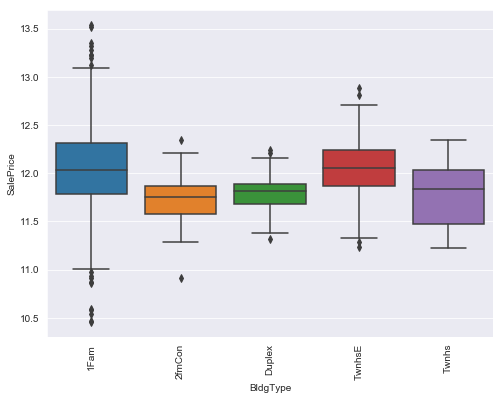

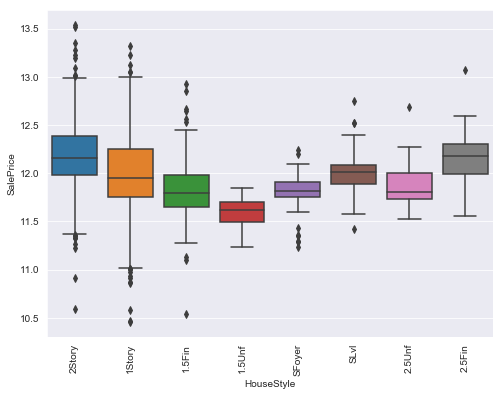

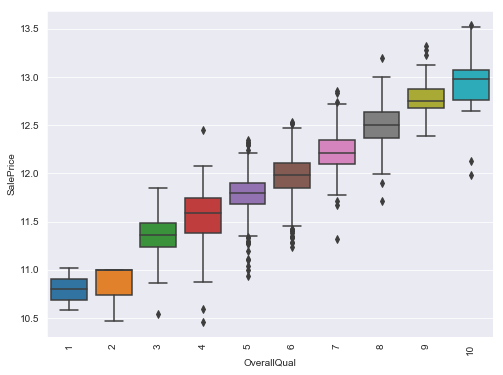

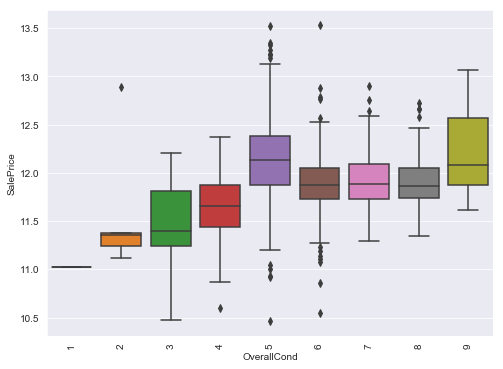

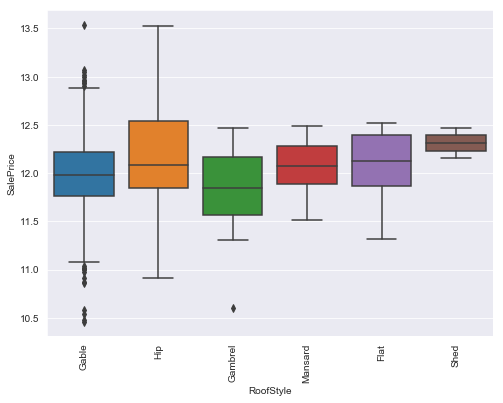

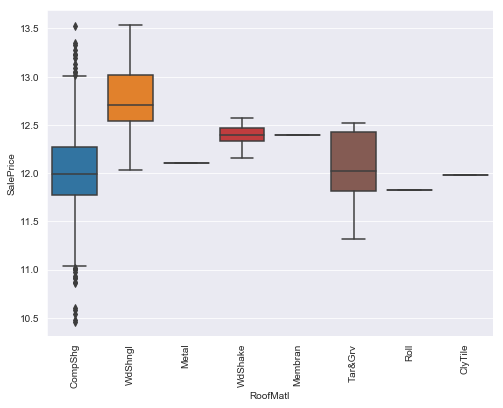

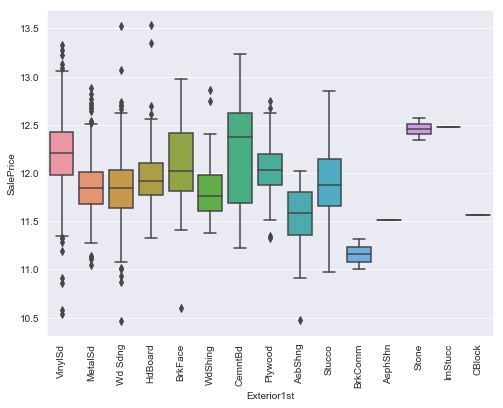

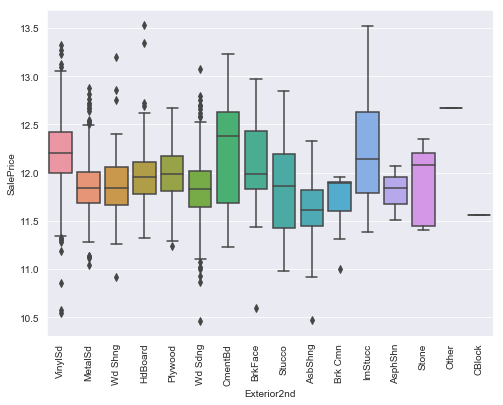

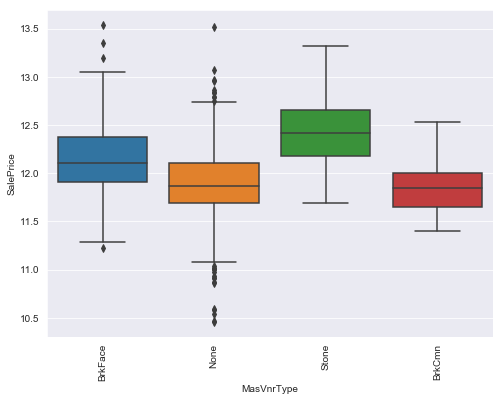

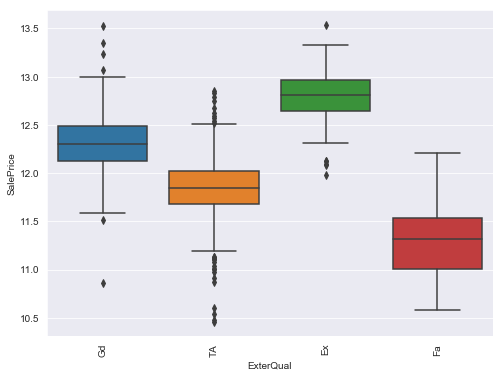

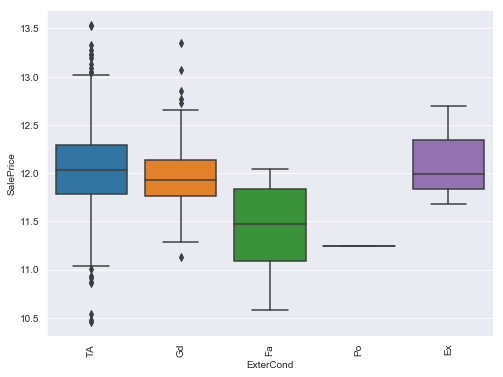

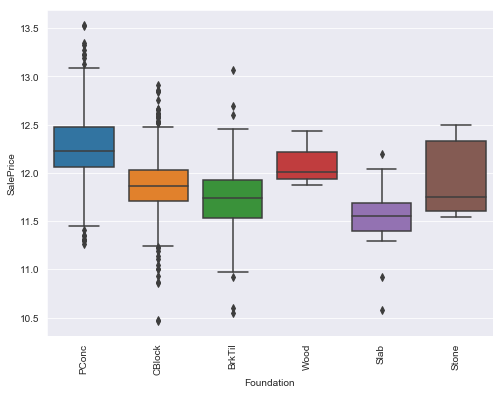

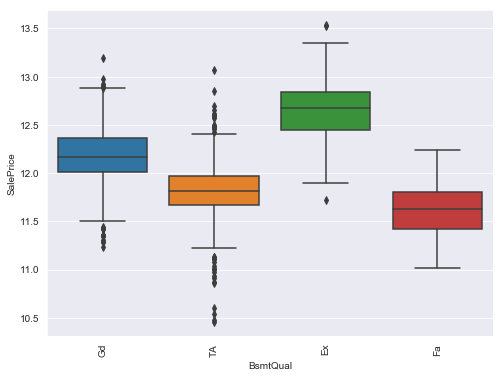

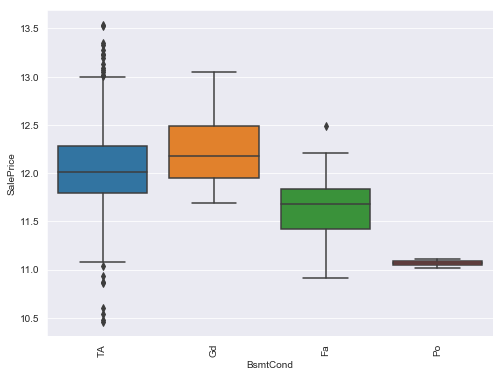

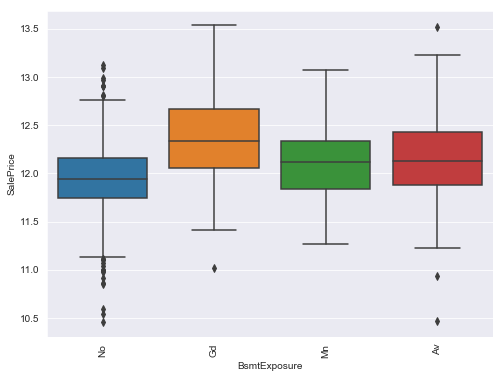

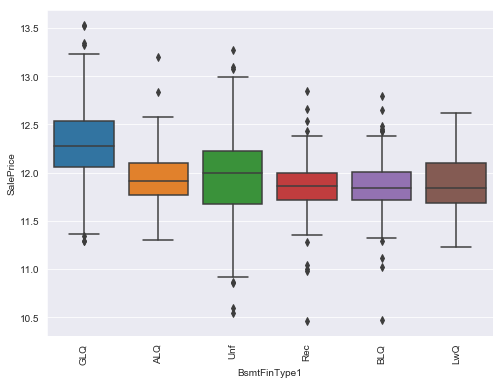

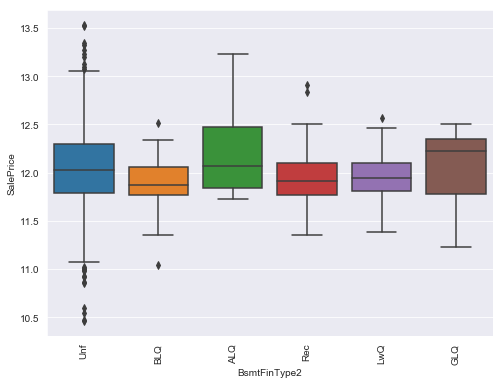

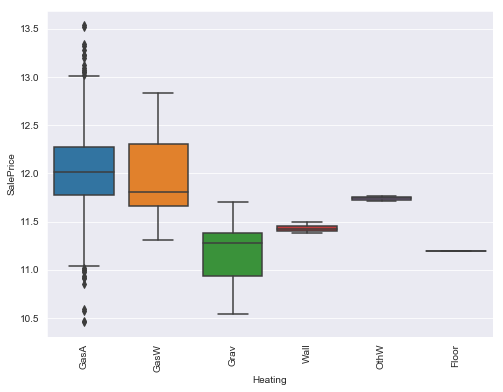

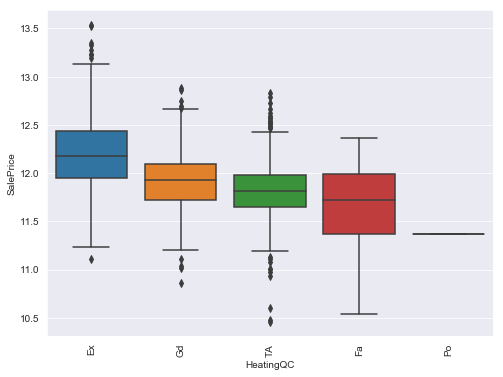

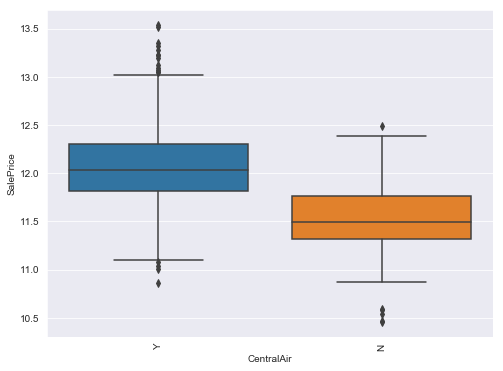

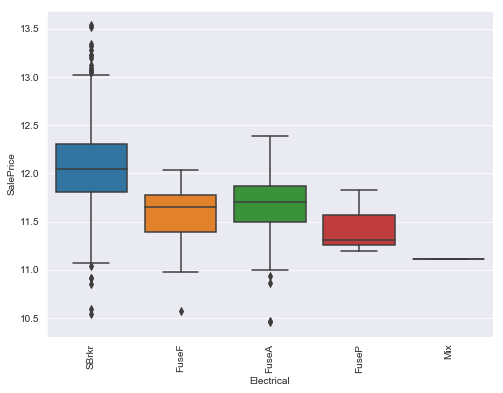

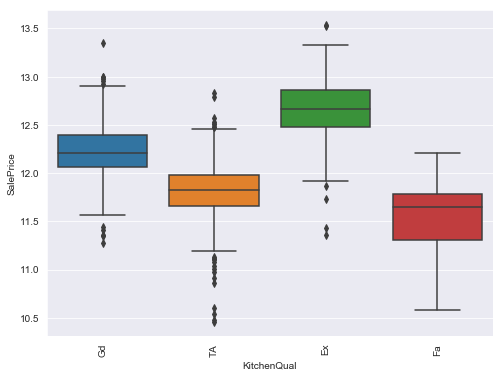

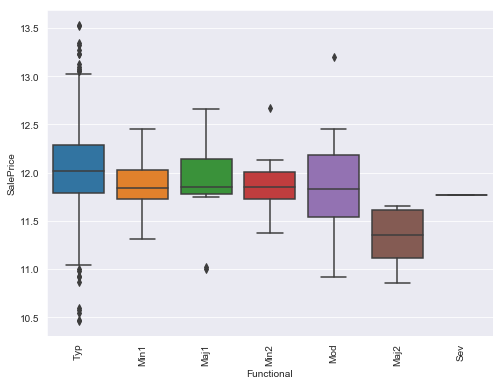

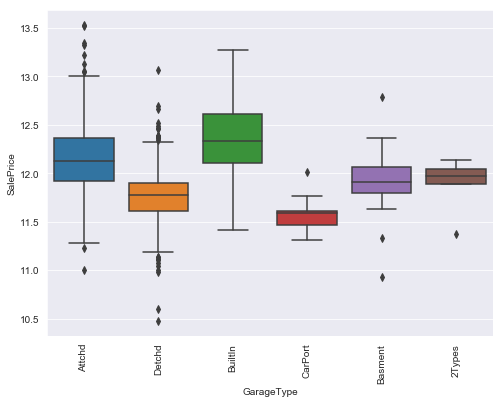

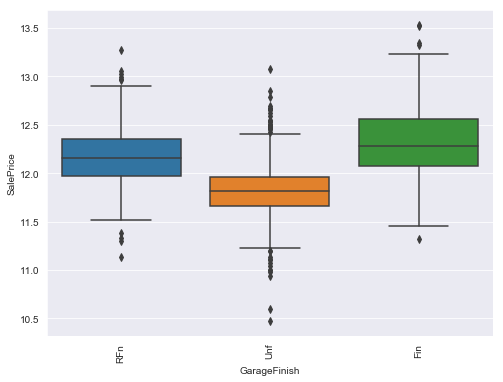

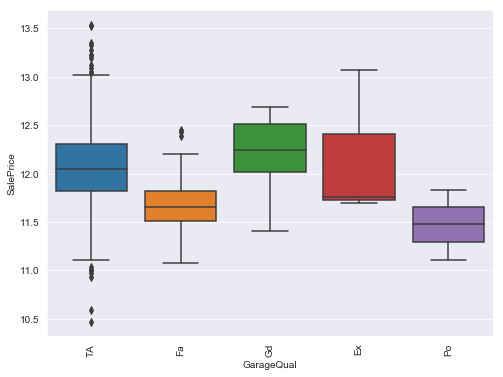

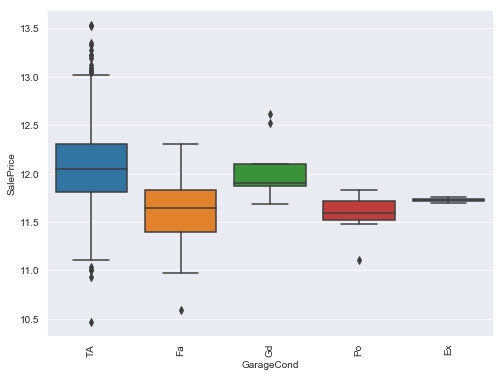

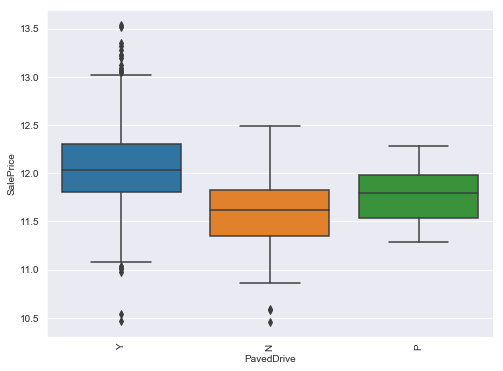

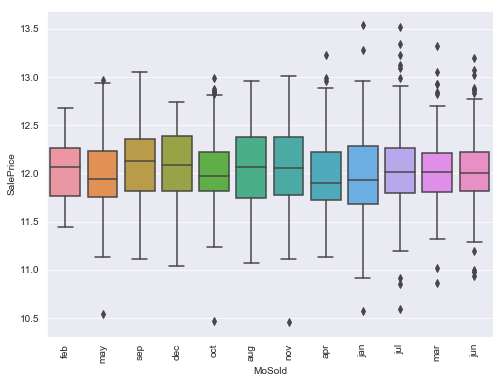

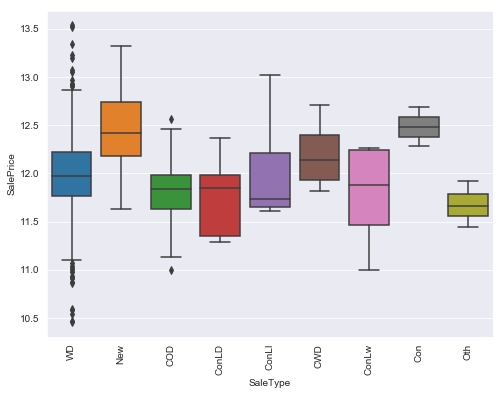

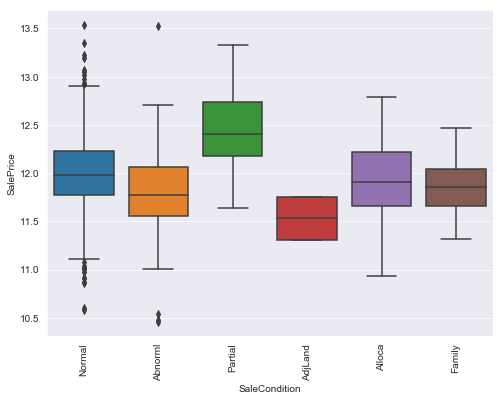

In [299]:
for key in categorical_features:
    categorical_comp(df_train, key)

In [300]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [301]:
year_features = [
    'YearBuilt',
    'YearRemodAdd',
    'GarageYrBlt',
    'YrSold'
]

In [302]:
df_train[year_features].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1460.000000,1460.000000,1379.000000,1460.000000
mean,1971.267808,1984.865753,1978.506164,2007.815753
std,30.202904,20.645407,24.689725,1.328095
min,1872.000000,1950.000000,1900.000000,2006.000000
25%,1954.000000,1967.000000,1961.000000,2007.000000
50%,1973.000000,1994.000000,1980.000000,2008.000000
75%,2000.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [303]:
year_min = 1900
year_max = 2010

df_train['YearBuilt'] = 2010 - df_train['YearBuilt']
df_train['YearRemodAdd'] = 2010 - df_train['YearRemodAdd']
df_train['GarageYrBlt'] = 2010 - df_train['GarageYrBlt']
df_train['YrSold'] = 2010 - df_train['YrSold']

df_test['YearBuilt'] = 2010 - df_test['YearBuilt']
df_test['YearRemodAdd'] = 2010 - df_test['YearRemodAdd']
df_test['GarageYrBlt'] = 2010 - df_test['GarageYrBlt']
df_test['YrSold'] = 2010 - df_test['YrSold']

In [304]:
df_train[year_features].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1460.000000,1460.000000,1379.000000,1460.000000
mean,38.732192,25.134247,31.493836,2.184247
std,30.202904,20.645407,24.689725,1.328095
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,6.000000,8.000000,1.000000
50%,37.000000,16.000000,30.000000,2.000000
75%,56.000000,43.000000,49.000000,3.000000
max,138.000000,60.000000,110.000000,4.000000


In [305]:
def numerical_comp(df, var):
    data = pd.concat([df['SalePrice'], df[var]], axis = 1)

#     f, ax = plt.subplots(figsize=(8,6))
    data.plot.scatter(x=var, y='SalePrice')
    plt.xticks(rotation=90)

In [306]:
numerical_filtered = dict(filter(lambda x: x[1]=='n', feature_categories.items()))

In [307]:
numerical_filtered

{'LotArea': 'n',
 'YearBuilt': 'n',
 'YearRemodAdd': 'n',
 'MasVnrArea': 'n',
 'BsmtFinSF1': 'n',
 'BsmtFinSF2': 'n',
 'BsmtUnfSF': 'n',
 'TotalBsmtSF': 'n',
 '1stFlrSF': 'n',
 '2ndFlrSF': 'n',
 'LowQualFinSF': 'n',
 'GrLivArea': 'n',
 'BsmtFullBath': 'n',
 'BsmtHalfBath': 'n',
 'FullBath': 'n',
 'HalfBath': 'n',
 'KitchenAbvGr': 'n',
 'TotRmsAbvGrd': 'n',
 'Fireplaces': 'n',
 'GarageYrBlt': 'n',
 'GarageCars': 'n',
 'GarageArea': 'n',
 'WoodDeckSF': 'n',
 'OpenPorchSF': 'n',
 'EnclosedPorch': 'n',
 '3SsnPorch': 'n',
 'ScreenPorch': 'n',
 'PoolArea': 'n',
 'MiscVal': 'n',
 'YrSold': 'n'}

In [308]:
numerical_features = [key for key in numerical_filtered]
numerical_features

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [309]:
df_train[numerical_features].head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,7,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,2
2,9600,34,34,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,3
3,11250,9,8,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,2
4,9550,95,40,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,4
5,14260,10,10,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,2


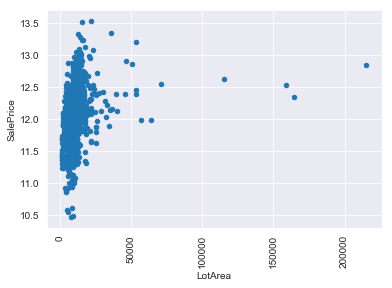

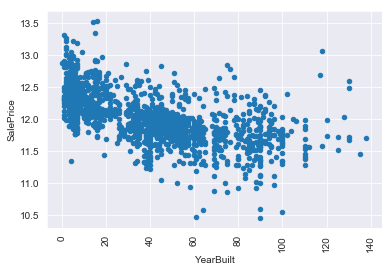

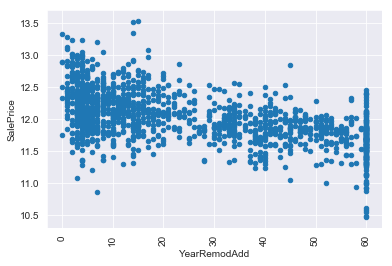

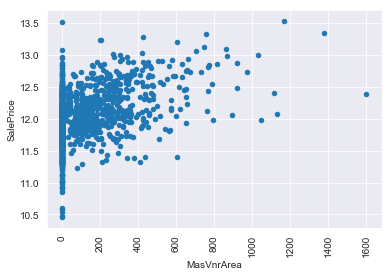

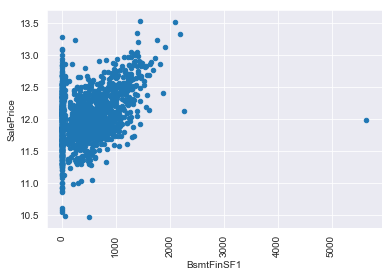

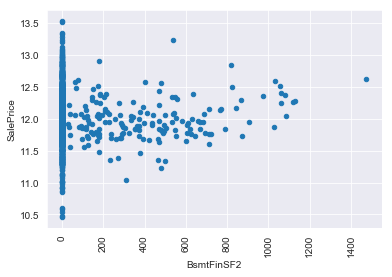

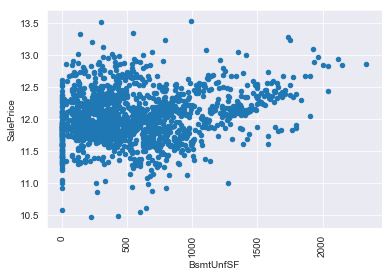

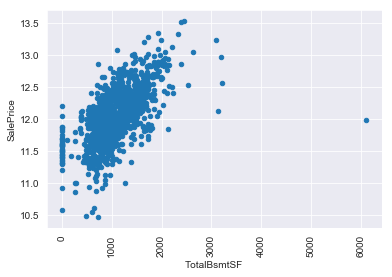

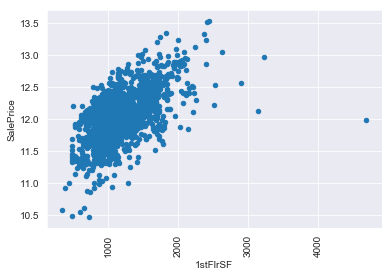

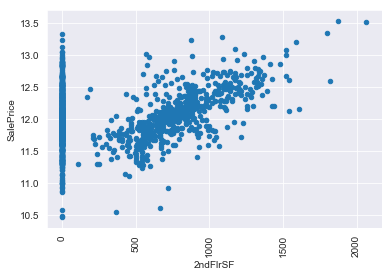

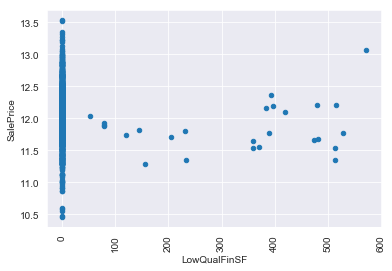

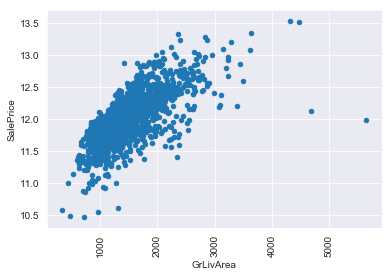

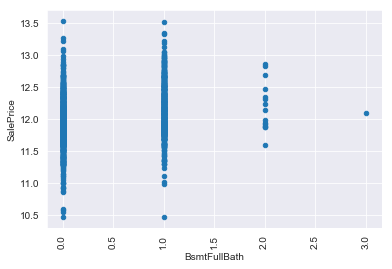

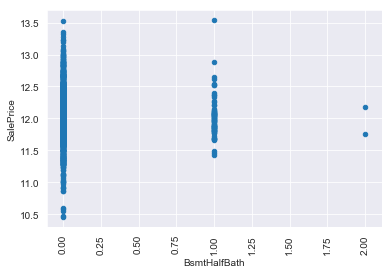

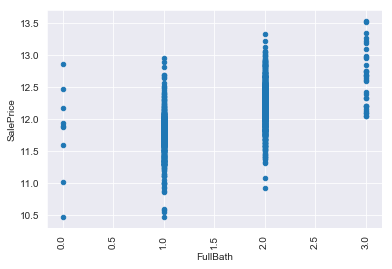

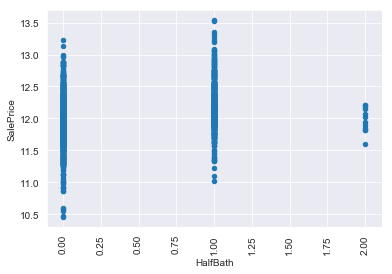

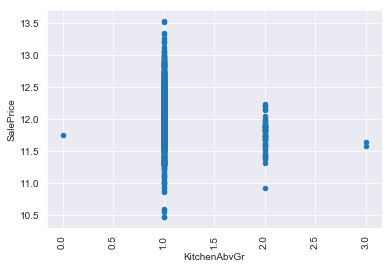

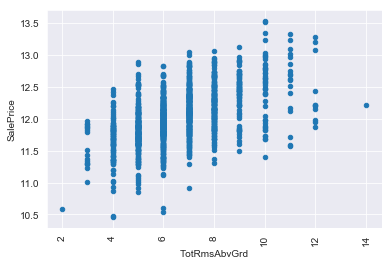

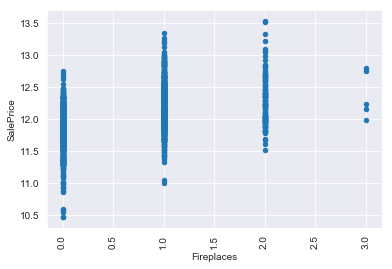

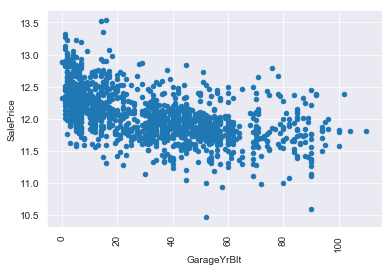

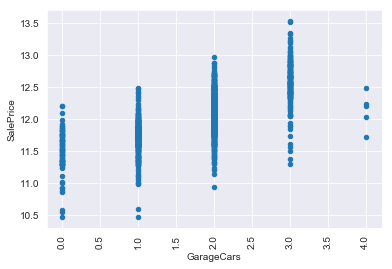

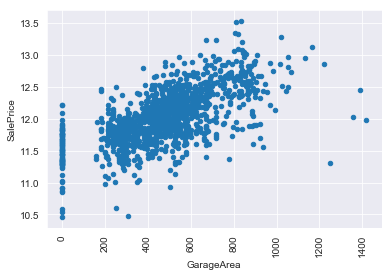

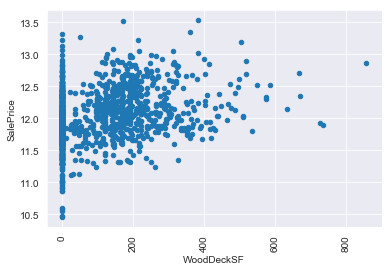

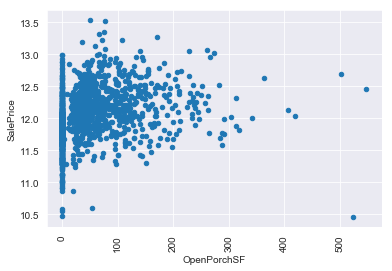

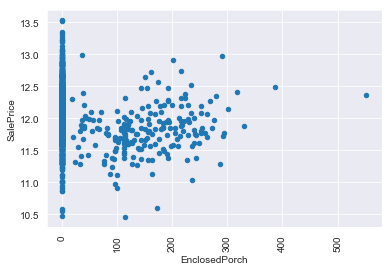

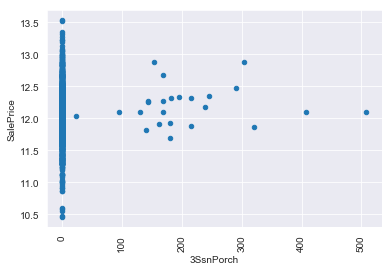

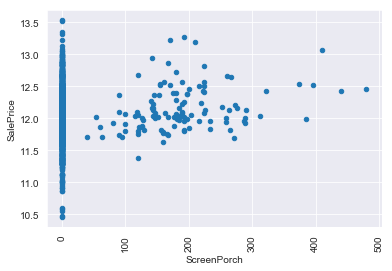

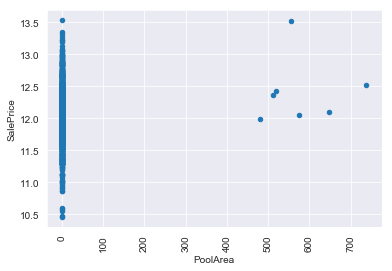

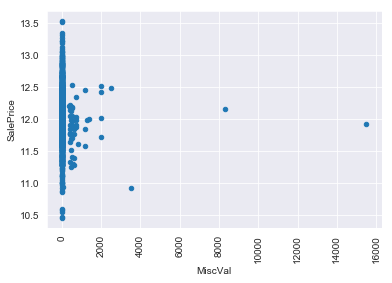

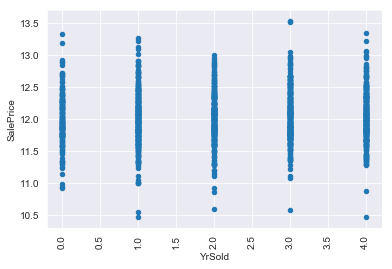

In [310]:
for feature in numerical_filtered:
    numerical_comp(df_train, feature)